In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [22]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'color',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=200,
    validation_split=0.2,  # Keep for data split during loading
    subset="training"
)

Found 54305 files belonging to 38 classes.
Using 43444 files for training.


In [23]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'color',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=200,
    validation_split=0.2,  # Keep for data split during loading
    subset="validation"
)

Found 54305 files belonging to 38 classes.
Using 10861 files for validation.


In [24]:
print(training_set.class_names)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [27]:
print(validation_set.class_names)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

## Model Building

In [41]:
resnet_model = tf.keras.models.Sequential()
pretrained_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(128,128,3),
    pooling="avg",
    classes=38,
)
for layer in pretrained_model.layers:
    layer.trainable = False

resnet_model.add(pretrained_model)
resnet_model.add(tf.keras.layers.Flatten())
resnet_model.add(tf.keras.layers.Dense(512, activation="relu"))
resnet_model.add(tf.keras.layers.Dense(units=38, activation="softmax"))    

In [42]:
resnet_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               1049088   
                                                                 
 dense_7 (Dense)             (None, 38)                19494     
                                                                 
Total params: 24,656,294
Trainable params: 1,068,582
Non-trainable params: 23,587,712
_________________________________________________________________


In [43]:
resnet_model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [44]:
training_history = resnet_model.fit(training_set,
                                    validation_data=validation_set,
                                    epochs=10)

Epoch 1/10
1358/1358 [==============================] - 587s 430ms/step - loss: 0.5280 - accuracy: 0.8608 - val_loss: 0.2345 - val_accuracy: 0.9294
Epoch 2/10
1358/1358 [==============================] - 551s 406ms/step - loss: 0.1631 - accuracy: 0.9514 - val_loss: 0.1667 - val_accuracy: 0.9473
Epoch 3/10
1358/1358 [==============================] - 546s 402ms/step - loss: 0.1070 - accuracy: 0.9681 - val_loss: 0.1379 - val_accuracy: 0.9549
Epoch 4/10
1358/1358 [==============================] - 545s 401ms/step - loss: 0.0759 - accuracy: 0.9789 - val_loss: 0.1288 - val_accuracy: 0.9595
Epoch 5/10
1358/1358 [==============================] - 545s 401ms/step - loss: 0.0561 - accuracy: 0.9853 - val_loss: 0.1217 - val_accuracy: 0.9608
Epoch 6/10
1358/1358 [==============================] - 544s 401ms/step - loss: 0.0424 - accuracy: 0.9898 - val_loss: 0.1309 - val_accuracy: 0.9591
Epoch 7/10
1358/1358 [==============================] - 543s 400ms/step - loss: 0.0330 - accuracy: 0.9925 - val_

## Evaluating the Model

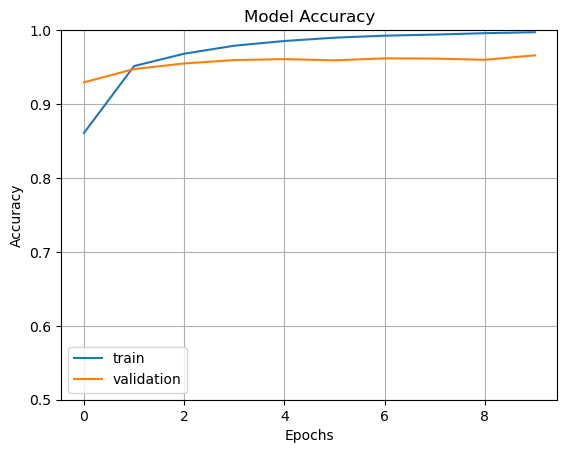

In [46]:
fig1 = plt.gcf()
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.axis(ymin=0.5, ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [47]:
train_loss, train_acc = resnet_model.evaluate(training_set)
print('Training accuracy:', train_acc)

1358/1358 [==============================] - 467s 344ms/step - loss: 0.0148 - accuracy: 0.9966
Training accuracy: 0.9966393709182739


In [48]:
val_loss, val_acc = resnet_model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

340/340 [==============================] - 116s 342ms/step - loss: 0.1103 - accuracy: 0.9658
Validation accuracy: 0.9658410549163818


## Saving Model

In [49]:
resnet_model.save('trained_resnet_model.keras')

In [50]:
training_history.history

{'loss': [0.5280090570449829,
  0.16313119232654572,
  0.10699963569641113,
  0.07588455080986023,
  0.05613650009036064,
  0.04242448881268501,
  0.03304017707705498,
  0.02614191733300686,
  0.02009565941989422,
  0.01563899777829647],
 'accuracy': [0.860809326171875,
  0.951362669467926,
  0.968073844909668,
  0.9789153933525085,
  0.9852914214134216,
  0.9897569417953491,
  0.9924960732460022,
  0.9939462542533875,
  0.995856761932373,
  0.997168779373169],
 'val_loss': [0.23450995981693268,
  0.16665257513523102,
  0.13793613016605377,
  0.12875057756900787,
  0.12168049812316895,
  0.13093262910842896,
  0.12329088151454926,
  0.11963184922933578,
  0.12470398843288422,
  0.11031469702720642],
 'val_accuracy': [0.9293803572654724,
  0.9473345279693604,
  0.9548844695091248,
  0.9594880938529968,
  0.9607771039009094,
  0.9591197967529297,
  0.9617899060249329,
  0.9615136981010437,
  0.959856390953064,
  0.9658410549163818]}

In [53]:
#Recording History in jason
import json
with open("training_hist.json","w")as f:
    json.dump(training_history.history,f)